In [1]:
# Importing libraries
import csv
import pandas as pd
import numpy as np
from sklearn import linear_model, svm, preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# Reading the datasets
data1 = pd.read_csv('wheat-2013-supervised.csv')
data2 = pd.read_csv('wheat-2014-supervised.csv')

In [3]:
# Merging two datasets
merged = data1.append(data2, ignore_index=True)
merged = merged[["CountyName","State","Latitude","Longitude","Date","apparentTemperatureMax","apparentTemperatureMin","cloudCover","dewPoint","humidity","precipIntensity","precipIntensityMax","precipProbability","precipAccumulation","precipTypeIsRain","precipTypeIsSnow","precipTypeIsOther",	"pressure",	"temperatureMax","temperatureMin","visibility",	"windBearing","windSpeed","NDVI","DayInSeason","Yield" ]]
merged.to_csv('merged.csv', index=None, header=True)

In [4]:
mg = pd.read_csv('merged.csv')
mg = mg[["Latitude","Longitude","apparentTemperatureMax","apparentTemperatureMin","cloudCover","dewPoint","humidity","precipIntensity","precipIntensityMax","precipProbability","precipAccumulation","precipTypeIsRain","precipTypeIsSnow","precipTypeIsOther",	"pressure",	"temperatureMax","temperatureMin","visibility",	"windBearing","windSpeed","NDVI","DayInSeason","Yield" ]]
mg.dropna(inplace=True)
mg = abs(mg)

In [5]:
print (mg.shape)


(359427, 23)


In [6]:
X = mg.iloc[:,0:22]  #independent columns
y = mg.iloc[:,-23]    #target column i.e price range
y=y.astype('int')
X

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,...,precipTypeIsSnow,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason
0,46.811686,118.695237,35.70,20.85,0.00,29.53,0.91,0.0000,0.0000,0.00,...,0.0,0.0,1027.13,35.70,27.48,2.46,214.0,1.18,134.110657,0.0
1,46.929839,118.352109,35.10,26.92,0.00,29.77,0.93,0.0001,0.0019,0.05,...,0.0,0.0,1026.87,35.10,26.92,2.83,166.0,1.01,131.506592,0.0
2,47.006888,118.510160,33.38,26.95,0.00,29.36,0.94,0.0001,0.0022,0.06,...,1.0,0.0,1026.88,33.38,26.95,2.95,158.0,1.03,131.472946,0.0
3,47.162342,118.699677,28.05,25.93,0.91,29.47,0.94,0.0002,0.0039,0.15,...,1.0,0.0,1026.37,33.19,27.17,2.89,153.0,1.84,131.288300,0.0
4,47.157512,118.434056,28.83,25.98,0.91,29.86,0.94,0.0003,0.0055,0.24,...,0.0,0.0,1026.19,33.85,27.07,2.97,156.0,1.85,131.288300,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360037,38.693595,94.671846,75.44,64.29,0.13,62.74,0.84,0.0211,0.2280,0.86,...,0.0,0.0,1013.01,75.44,64.29,9.31,133.0,6.26,134.803101,185.0
360038,38.603699,94.992247,75.47,64.49,0.13,62.83,0.84,0.0206,0.2074,0.85,...,0.0,0.0,1012.99,75.47,64.49,9.29,132.0,6.29,133.913879,185.0
360039,38.580826,94.794660,75.40,64.43,0.13,62.77,0.84,0.0212,0.2172,0.86,...,0.0,0.0,1013.01,75.40,64.43,9.28,132.0,6.27,129.938950,185.0
360040,38.564866,94.748021,75.35,64.44,0.13,62.74,0.84,0.0214,0.2177,0.86,...,0.0,0.0,1013.01,75.35,64.44,9.28,132.0,6.26,129.938950,185.0


In [7]:
# Determining the best features from the data
# Applying SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns


In [8]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                     Specs          Score
18             windBearing  584431.000407
3   apparentTemperatureMin  490523.148008
5                 dewPoint  388245.325492
2   apparentTemperatureMax  379951.701286
16          temperatureMin  372298.742126
15          temperatureMax  290953.292597
0                 Latitude  233754.438546
1                Longitude   97060.962816
20                    NDVI   35048.564785
19               windSpeed   25328.273283


[0.45417846 0.10641279 0.03044742 0.03106739 0.03137453 0.03241154
 0.02910026 0.0090136  0.00878302 0.00976205 0.00201189 0.00383102
 0.00170573 0.         0.03495032 0.03147238 0.03246162 0.02560428
 0.03433404 0.03188854 0.02824402 0.03094512]


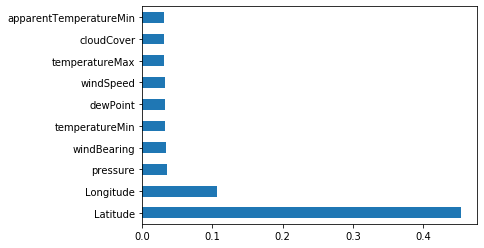

In [9]:
# Verify the results of aboove method by using feature importance method
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [10]:
# mg = mg[["Latitude","Longitude","apparentTemperatureMax","apparentTemperatureMin","dewPoint",	"temperatureMax","temperatureMin",	"windBearing","windSpeed","NDVI","Yield" ]]
mg = mg[1:10000]
X = np.array(mg.drop(["Yield"],1))
y = np.asarray(mg['Yield'],dtype= np.int64)


In [11]:
# Applying Decision Tree Classifier with prunning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2,max_leaf_nodes = 45, 
                             min_samples_leaf = 6 , random_state=1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.2876666666666667


In [12]:
clf = DecisionTreeRegressor(max_depth=2, min_samples_split=2,max_leaf_nodes = 6, 
                             min_samples_leaf = 3 , random_state=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.619717978000977


In [13]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
# cross_val_score(model, X_test, y_test)
model.score(X_test, y_test)


0.3118119527444193

In [14]:
y_pred = model.predict(X_test)
y_pred,y_test

(array([38.02520624, 26.89892939, 33.27143514, ..., 29.32698665,
        43.9368136 , 19.56430904]),
 array([58, 17, 42, ..., 18, 63, 24]))

In [15]:
# Code for Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0,max_depth=2,min_samples_leaf = 3 ) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train) 
accuracy = regressor.score(X_test, y_test)
print(accuracy)

0.6307538474501901


In [ ]:
#Code for SVM
#clf = svm.SVR(kernel="poly")
#clf.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='linear')
# cross_val_score(clf, X, y)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)